# <font color="#3A40A2">📘 Introducción al Aprendizaje No Supervisado - Parte práctica </font>

**Materia: Ciencia de Datos aplicada a los Negocios - Universidad de San Andrés**

**Autor: [Lucas BALDEZZARI](https://www.linkedin.com/in/lucasbaldezzari/)**

**2025**

---

## <font color="#004eb3">Temas de la Colab</font>

Para esta clase, los temas que veremos son:

- Repaso de Aprendizaje Supervisado
- Introducción al Aprendizaje No Supervisado
- Diferencias entre aprendizaje supervisado y no supervisado.
- Introducción a algoritmos de aprendizaje no supervisado (clustering, jerárquicos).
- Introducción a técnicas de evaluación y validación de algoritmos no supervisados.

Es importante prestar atención a los siguientes íconos o emojis que aparezcan a lo largo de la Colab.

- 📘 **Teoría**: Conceptos teóricos.
- 📚 **Lectura**: Material adicional que puedes consultar para profundizar en el tema.
- 📊 **Ejemplo**: Ejemplo para demostrar y/o reforzar conceptos.
- 🔗 **Enlace**: Recursos externos que puedes visitar para obtener más información.
- ❓ **Pregunta**: Preguntas disparadas a lo largo del contenido para reflexionar sobre los ejemplos y conceptos tratados.
- 💻 **Código**: Indica que la celda de abajo es una celda con código y debe ser ejecutada para ver su contenido.

### 📘 <font color="#00b351">Repaso de Aprendisaje Supervisado (AS)</font>.

> El *Aprendizaje Supervisado* es una técnica de aprendizaje automático donde el modelo se entrena con un conjunto de datos etiquetados. Esto significa que cada entrada del conjunto de datos tiene una etiqueta o resultado conocido, lo que permite al modelo aprender a predecir resultados para nuevas entradas.

¿Por qué es importante el Aprendizaje Supervisado? El AS es fundamental en muchas aplicaciones prácticas, como la clasificación de correos electrónicos, el reconocimiento de voz, la predicción de precios o resolver problemas de clasificación. Permite a los modelos (máquina) aprender patrones a partir de datos históricos y hacer predicciones en situaciones futuras.

Ejemplos de Aprendizaje Supervisado incluyen:
- *Clasificación*: Asignar una etiqueta a una entrada, como clasificar correos electrónicos como "spam" o "no spam".
- **Regresión**: Predecir un valor continuo, como el precio de una casa basado en características como el tamaño, la ubicación y el número de habitaciones.
- **Detección de Anomalías**: Identificar datos que se desvían significativamente del comportamiento normal, como detectar fraudes en transacciones financieras.
- *Reconocimiento de Imágenes*: Identificar objetos o características en imágenes, como reconocer rostros en fotos.
- *Procesamiento de Lenguaje Natural (NLP)*: Analizar y comprender el lenguaje humano, como la clasificación de sentimientos en reseñas de productos.
- **Recomendación de Productos**: Sugerir productos a los usuarios basándose en sus preferencias y comportamientos anteriores.
- **Predicción de Series Temporales**: Predecir valores futuros basándose en datos históricos, como pronosticar la demanda de un producto.
- **Análisis de Sentimientos**: Evaluar opiniones o emociones expresadas en texto, como determinar si una reseña es positiva o negativa.
- Entre otros.

#### 📊 **<font color="#d6b302">Prediciendo precios de casas</font>**

Un problema clásico de regresión en el aprendizaje supervisado es la predicción del precio de una casa. En este caso, el modelo se entrena con un conjunto de datos que incluye características de las casas (como tamaño, ubicación, número de habitaciones) y sus precios correspondientes. Una vez entrenado, el modelo puede predecir el precio de una nueva casa basándose en sus características.


#### Set de datos

En este caso usaremos el set de datos llamado *"California Housing"*, que contiene información sobre casas en California, incluyendo características como el número de habitaciones, el tamaño del terreno y el precio de la casa. Este set de datos es ampliamente utilizado para demostrar técnicas de regresión en aprendizaje supervisado.

*IMPORTANTE*: Cada fila del set de datos representa un distrito de California.

💻 **Analizando nuestros datos** 💻

Lo primero que se debe hacer en cualquier problema, es analizar los datos que tenemos. Vamos a cargar el set de datos y a generar algunas tablas y gráficos para entender mejor la distribución de los datos y algunas características de las casas.

Para ver esto, deberás ejecutar las celdas de código que se encuentra debajo.

In [9]:
## **** CÓDIGO PYTHON ****

##Clonamos el repositorio para poder usar las funciones
## Esperar unos segundos hasta ver un 100% de descarga
# !git clone https://github.com/lucasbaldezzari/cdan.git

In [10]:
from funciones.intro_ans import get_housingdata
housing = get_housingdata()

print("La cantidad de datos es:", len(housing))

print("Primeras 5 filas del set de datos:")
housing.head()

La cantidad de datos es: 20640
Primeras 5 filas del set de datos:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


❓ ¿Qué caracaterísticas (columnas) conforman nuestro set de datos? ❓

Como podemos ver, tenemos varias columnas que representan diferentes características de las casas, como el número de habitaciones, la media de la edad de las casas, y el precio medio de las casas para un distrito. Estas características son las que utilizaremos para entrenar nuestro modelo de regresión.

💻 Información resumida 💻

Vamos a analizar algunas columnas de nuestro set de datos de manera rápida.

Por favor, ejecuta la siguiente celda de código.

In [11]:
housing[["housing_median_age","total_rooms","median_income","median_house_value"]].describe()

,housing_median_age,total_rooms,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,3.870671,206855.816909
std,12.585558,2181.615252,1.899822,115395.615874
min,1.000000,2.000000,0.499900,14999.000000
25%,18.000000,1447.750000,2.563400,119600.000000
50%,29.000000,2127.000000,3.534800,179700.000000
75%,37.000000,3148.000000,4.743250,264725.000000
max,52.000000,39320.000000,15.000100,500001.000000


La tabla anterior nos muestra algunas estadísticas descriptivas de las columnas seleccionadas. Por ejemplo, podemos ver que la edad media de las casas es de 28.6 años, el número total de habitaciones varía entre 2 y 39, y el ingreso medio es de aproximadamente 3.87 (en miles de USD). Además, el valor medio de las casas es de aproximadamente 206855 (en USD).

💻 Histogramas para analizar distribuciones 💻

Dicen que una imagen vale más que mil palabras, y en este caso, un gráfico puede ayudarnos a entender mejor la distribución de los datos. Vamos a generar algunos histogramas para visualizar la distribución de las características más importantes de las casas.

Por favor, ejecuta la siguiente celda de código.

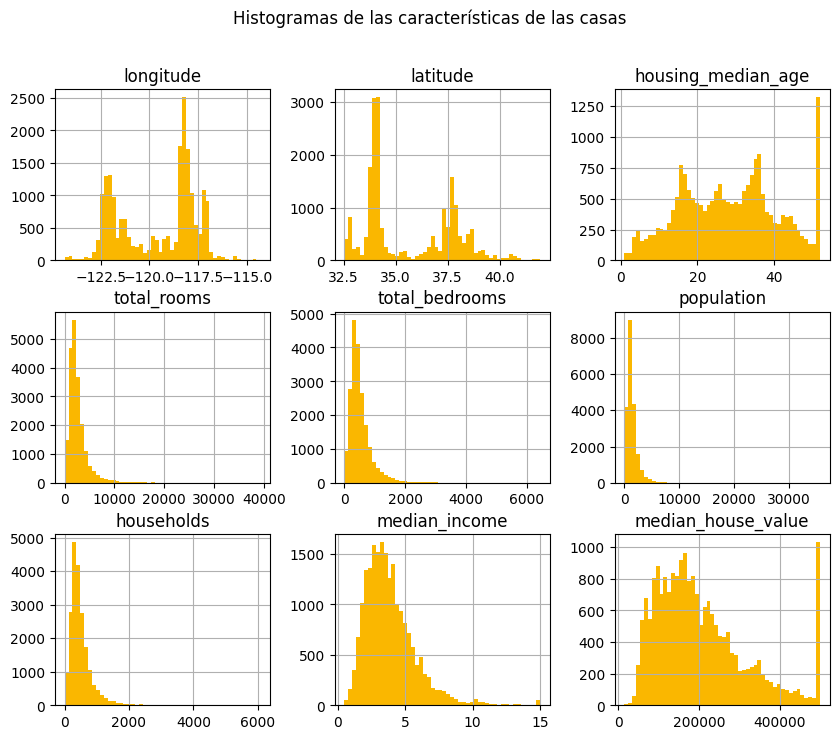

In [12]:
from funciones.intro_ans import plot_histograms
plot_histograms(housing,(10,8))

--- ❓ ---

- ¿Qué información podemos obtener de los histogramas anteriores?
- Hemos visto que la media de la columna `median_house_value` es de aproximadamente $206855$ U$D. ¿Está bien este valor si miramos la distribución? ¿Recomendarías usar la media como una medida representativa del precio de las casas? ¿Por qué?
- ¿Crees que hay alguna característica que podría ser más relevante para predecir el precio de una casa? ¿Por qué?
- ¿Hay alguna característica que crees que no es relevante para predecir el precio de una casa? ¿Por qué?

--- ❓ ---

💻 **Visualizando datos geográficos** 💻

Ahora vamos a generar un gráfico del tipo "dispersión" para visualizar la distribución de las casas en California. En este gráfico, cada punto representará una casa y su color indicará el precio de la casa. Esto nos permitirá ver cómo se distribuyen los precios de las casas en diferentes áreas geográficas.

Por favor, ejecuta la siguiente celda de código.

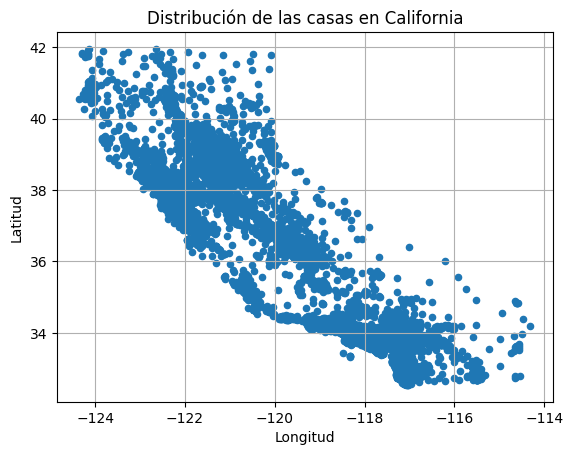

In [13]:
from funciones.intro_ans import makeSimpleScatterHousing
makeSimpleScatterHousing(housing, (10,6))

💻 **Mejorando la visualización geográfica** 💻

Vamos a generar un gráfico que muestre el mapa de California con la distribución de los distritos como puntos en el mapa, además, cada punto tendrá un color que representa el precio de la casa, finalmente, el diámetro de cada punto será proporcional a la población dentro del distrito. Esto nos permitirá visualizar la distribución geográfica de los precios de las casas en California.

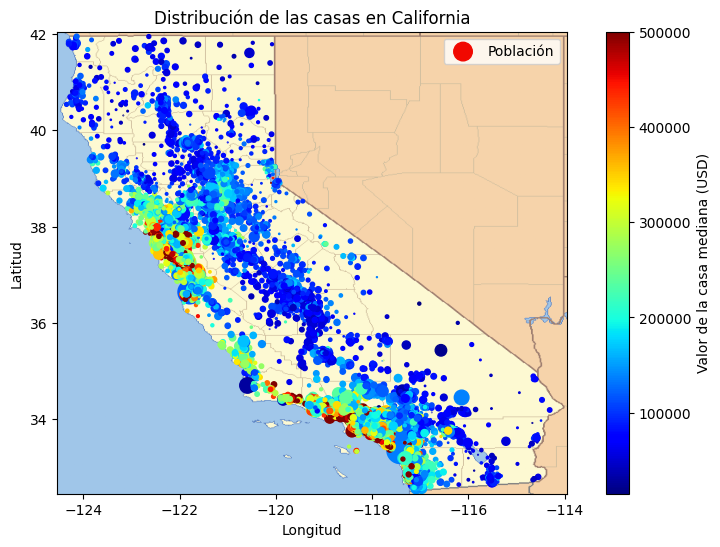

In [14]:
from funciones.intro_ans import makeBetterScatterHousing
makeBetterScatterHousing(housing, (10,6))

El gráfico anterior es mucho más informativo. Podemos ver, que en general, os distritos más están sobre la costa (lo cual es lo esperable).

💻 **Entrenando un regresor** 💻

Queremos predecir el precio de una casa en función de sus características. Para esto, vamos a entrenar un modelo de regresión lineal utilizando el set de datos de California Housing. Este modelo aprenderá a predecir el precio de una casa basándose en las características que hemos analizado anteriormente.

Por favor, ejecuta la siguiente celda de código.

QUE LA FUNCIÓN makeLinearRegressionPipeline RETORNE EL MODELO YA ENTRENADO, ADEMÁS, QUE RETORNE LOS DATOS DE ENTRENAMIENTO Y TESTEO.

In [15]:
from funciones.intro_ans import makeLinearRegressionPipeline
from sklearn.model_selection import train_test_split
regresor = makeLinearRegressionPipeline(housing)

# strat_train_set, strat_test_set = train_test_split(
#     housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

# housing = strat_train_set.drop("median_house_value", axis=1)
# housing_labels = strat_train_set["median_house_value"].copy()

# regresor.fit(housing, housing_labels)